In [1]:
import json
import requests
import pandas as pd
import time
from fake_useragent import UserAgent
from datetime import datetime
from sqlalchemy import create_engine
from collections import Counter
import mysql.connector
# import setting
import csv
import matplotlib.pyplot as plt


In [2]:
def transform_date(date):
        y, m, d = date.split('/')
        return str(int(y)+1911) + '/' + m  + '/' + d

In [3]:
def Get_stock_data(url):
    
    ua = UserAgent()
    headers = {"User-Agent":ua.random}
    res = requests.get(url,headers=headers,timeout=10.0)
    json_stock = json.loads(res.content)
    print("status_code: ",res.status_code)
    result = []
    
    for i in range(len(json_stock["data"])):
        try:
            Date = datetime.strptime(transform_date(json_stock["data"][i][0]),"%Y/%m/%d")
            Transaction_count = int(json_stock["data"][i][1].replace(",",""))
            Transaction_amount = int(json_stock["data"][i][2].replace(",",""))
            Opening_price = float(json_stock["data"][i][3])
            Highest_price = float(json_stock["data"][i][4])
            Lowest_price = float(json_stock["data"][i][5])
            Closing_price = float(json_stock["data"][i][6])

            if json_stock["data"][i][7] == "X0.00":
                Price_spread = 0.00
            else:
                Price_spread = float(json_stock["data"][i][7])

            Number_of_transactions = int(json_stock["data"][i][8].replace(",",""))

            dict_result = {
                "Number":str(stock),
                "Date":Date,
                "Transaction_count":Transaction_count,
                "Transaction_amount":Transaction_amount,
                "Opening_price":Opening_price,
                "Highest_price":Highest_price,
                "Lowest_price":Lowest_price,
                "Closing_price":Closing_price,
                "Price_spread":Price_spread,
                "Number_of_transactions":Number_of_transactions

            }

            result.append(dict_result)
            
        except ValueError :
            pass 
        
    return result

In [4]:
stock = "2330"
local_date = datetime.now().strftime('%Y%m%d')
timestamp = str(int(time.time()))
url = "https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date="+local_date+"&stockNo="+stock+"&_=" +timestamp
# result_list = Get_stock_data(url)

In [5]:
# df = pd.DataFrame(result_list,columns=["Number","Date","Opening_price","Closing_price","Highest_price","Lowest_price","Number_of_transactions"])


In [6]:
if __name__ == "__main__":
    result = Get_stock_data(url)


status_code:  200


In [9]:
df = pd.DataFrame(result,columns=["Number","Date","Opening_price","Closing_price","Highest_price","Lowest_price","Number_of_transactions"])

In [11]:
x = df["Date"]
y = df["Closing_price"]
plt.plot(x.y)
plt.show

AttributeError: 'Series' object has no attribute 'y'

C:\Users\Ryan\Anaconda3\envs\spider\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


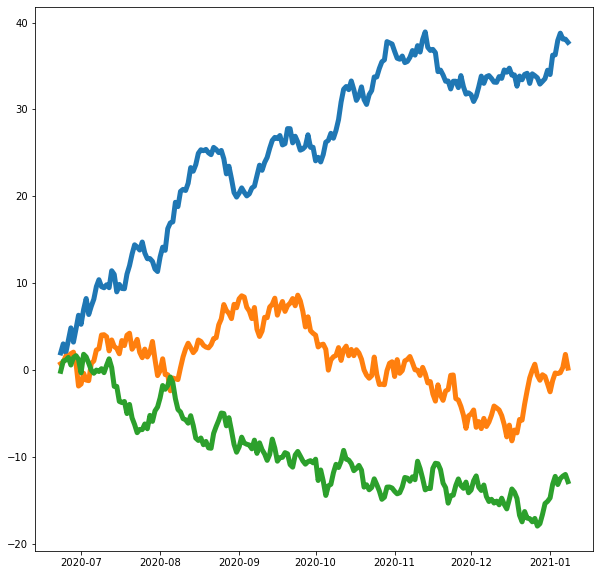

In [13]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['figure.figsize'] = (10, 10)
plt.gcf().set_size_inches(10, 10)

x = pd.period_range(pd.datetime.now(), periods=200, freq='d')
x = x.to_timestamp().to_pydatetime()
# 產生三組，每組 200 個隨機常態分布元素
y = np.random.randn(200, 3).cumsum(0)
plt.plot(x, y)
plt.show()